# Examples
Website: `http://rasbt.github.io/mlxtend/`
        

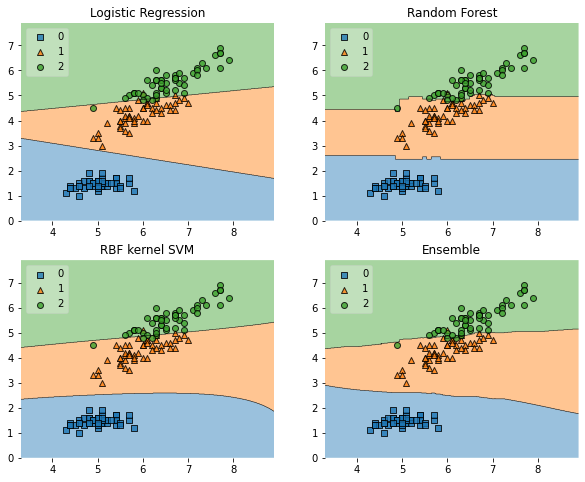

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


# Association Rules Generation from Frequent Itemsets

- `http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/`
    

## Example 1 -- Generating Association Rules from Frequent Itemsets

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth


dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
### alternatively:
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Kidney Beans, Yogurt)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Eggs, Onion)"


In [3]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


## Example 2 -- Rule Generation and Selection Criteria

In [4]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [5]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1


In [8]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


In [7]:
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2


## Example 3 -- Frequent Itemsets with Incomplete Antecedent and Consequent Information

In [9]:
import pandas as pd

dict = {'itemsets': [['177', '176'], ['177', '179'],
                     ['176', '178'], ['176', '179'],
                     ['93', '100'], ['177', '178'],
                     ['177', '176', '178']],
        'support':[0.253623, 0.253623, 0.217391,
                   0.217391, 0.181159, 0.108696, 0.108696]}

freq_itemsets = pd.DataFrame(dict)
freq_itemsets

,itemsets,support
0,"[177, 176]",0.253623
1,"[177, 179]",0.253623
2,"[176, 178]",0.217391
3,"[176, 179]",0.217391
4,"[93, 100]",0.181159
5,"[177, 178]",0.108696
6,"[177, 176, 178]",0.108696


In [10]:
from mlxtend.frequent_patterns import association_rules

res = association_rules(freq_itemsets, support_only=True, min_threshold=0.1)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(177),(176),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
1,(176),(177),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
2,(179),(177),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
3,(177),(179),NaN,NaN,0.253623,NaN,NaN,NaN,NaN
4,(178),(176),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
5,(176),(178),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
6,(179),(176),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
7,(176),(179),NaN,NaN,0.217391,NaN,NaN,NaN,NaN
8,(100),(93),NaN,NaN,0.181159,NaN,NaN,NaN,NaN
9,(93),(100),NaN,NaN,0.181159,NaN,NaN,NaN,NaN


In [11]:
res = res[['antecedents', 'consequents', 'support']]
res

,antecedents,consequents,support
0,(177),(176),0.253623
1,(176),(177),0.253623
2,(179),(177),0.253623
3,(177),(179),0.253623
4,(178),(176),0.217391
5,(176),(178),0.217391
6,(179),(176),0.217391
7,(176),(179),0.217391
8,(100),(93),0.181159
9,(93),(100),0.181159


### Example 4 -- Pruning Association Rules


In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [13]:
antecedent_sele = rules['antecedents'] == frozenset({'Onion', 'Kidney Beans'}) # or  frozenset({'Kidney Beans', 'Onion'})
consequent_sele = rules['consequents'] == frozenset({'Eggs'})
final_sele = (antecedent_sele & consequent_sele)

rules.loc[ ~final_sele ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


# Frequent Itemsets via Apriori Algorithm

- Reference: `http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/`


## Example 1 -- Generating Frequent Itemsets

In [40]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

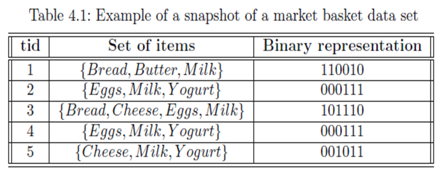

In [39]:
from PIL import Image
img = Image.open('image.png')
img = img.resize((440, 175))
img.save('basket_1.png')

from IPython import display
display.Image('basket_1.png')


In [16]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [17]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6)


,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [18]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


## Example 2 -- Selecting and Filtering Results

In [19]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Kidney Beans, Yogurt)",2


In [20]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]


,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [21]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]


,support,itemsets,length
6,0.6,"(Eggs, Onion)",2


## Example 3 -- Working with Sparse Representations

In [22]:
oht_ary = te.fit(dataset).transform(dataset, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,0,0,0,1,0,True,1,1,1,0,1
1,0,0,1,1,0,True,0,1,1,0,1
2,1,0,0,1,0,True,1,0,0,0,0
3,0,1,0,0,0,True,1,0,0,1,1
4,0,1,0,1,1,True,0,0,1,0,0


In [23]:
apriori(sparse_df, min_support=0.6, use_colnames=True, verbose=1)

Processing 21 combinations | Sampling itemset size 3


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


# Pandas expressions


In [41]:
# load pandas
import pandas as pd
data_url = 'http://bit.ly/2cLzoxH'
# read data from url as pandas dataframe
gapminder = pd.read_csv(data_url)

In [42]:
gapminder

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [43]:
gapminder_no_NA = gapminder[gapminder.year.notnull()]
gapminder_no_NA

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [46]:
gapminder_not_2002 = gapminder[gapminder.year != 2002]
gapminder_not_2002

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1698,Zimbabwe,1982,7636524.0,Africa,60.363,788.855041
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
